In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Bigfoot Data Analysis

In [2]:
bigfoot = pd.read_csv("..//Data Cleaning/resources/bigfoot_data.csv")
bigfootData = pd.DataFrame(bigfoot)
bigfootData.head()

,Unnamed: 0,number,title,timestamp,latitude,longitude,observed,location_details,state,summary
0,0,637,Report 637: Campers' encounter just after dark...,2000-06-16 12:00:00+00:00,61.5000,-142.9000,My hiking partner and I arrived late to the Ke...,"On the main trail toward the glacier, before t...",Alaska,Cloudy skies throughout the day.
1,1,2917,Report 2917: Family observes large biped from car,1995-05-15 12:00:00+00:00,55.1872,-132.7982,"I was going for a drive. I had 3 kids with me,...","Between the sort yard and the garbage dump, on...",Alaska,Cloudy skies throughout the day.
2,2,7963,Report 7963: Sasquatch walks past window of ho...,2004-02-09 12:00:00+00:00,55.2035,-132.8202,This incident happened last night just after 1...,At the edge of town.,Alaska,Cloudy skies throughout the day with a chance ...
3,3,9317,"Report 9317: Driver on Alcan Highway has noon,...",2004-06-18 12:00:00+00:00,62.9375,-141.5667,"My daughter and I were traveling to Tok, Alask...",We were traveling westbound when the animal wa...,Alaska,Partly cloudy throughout the day.
4,4,13038,Report 13038: Snowmobiler has encounter in dee...,2004-02-15 12:00:00+00:00,61.0595,-149.7853,I and two of my friends were bored one night s...,Up near powerline clearings east of Potter Mar...,Alaska,Clear conditions throughout the day.


In [17]:
#find state with most bigfoot sightings
state = bigfootData.groupby(['state'])['state'].count().sort_values(ascending=False)
state

state
Washington        467
Ohio              247
Florida           245
California        231
Illinois          172
Oregon            161
Texas             140
Michigan          128
Missouri          117
Georgia            88
West Virginia      87
Colorado           86
Kentucky           78
Alabama            77
Arkansas           76
North Carolina     66
Wisconsin          65
Virginia           63
Oklahoma           62
Tennessee          56
Idaho              49
New York           48
Arizona            46
New Jersey         40
Pennsylvania       39
Montana            39
Minnesota          35
Iowa               35
Indiana            34
Kansas             34
Utah               32
South Carolina     26
Louisiana          26
New Mexico         24
Massachusetts      19
Mississippi        17
Connecticut        11
Maryland           11
Nebraska           10
Alaska             10
Wyoming             9
Maine               8
Nevada              7
New Hampshire       7
South Dakota        6
Rhod

In [85]:
#make dataframe of top 5 states
top_states = bigfootData.loc[bigfootData['state'].isin(['Washington', 'Ohio', 'Florida', 'California', 'Illinois'])]
top_states = top_states.drop(columns=['Unnamed: 0'])
top_states.head()

,number,title,timestamp,latitude,longitude,observed,location_details,state,summary
124,83,Report 83: Early dawn sighting by hunters near...,1988-10-01 12:00:00+00:00,37.35944,-119.6436,Early in the morning before light my friend an...,The sighting took place at the end of a road l...,California,Clear conditions throughout the day.
125,147,Report 147: Sound reports from resident in Sou...,2000-06-15 12:00:00+00:00,38.93333,-119.9833,"At our home south of South Lake Tahoe, we have...",south of South Lake Tahoe,California,Clear conditions throughout the day.
126,353,Report 353: Night sighting by two motorists ne...,2000-09-23 12:00:00+00:00,38.95750,-120.0914,"On Saturday night Sept 23, 2000 (last night) m...",West Lake Tahoe just north of Sugar Pine Point...,California,Clear conditions throughout the day with early...
127,528,Report 528: Three children have daytime sighti...,1957-06-01 12:00:00+00:00,40.80222,-124.1625,I was about 10 or 11 years old. My brother 15...,The end of Ole Hanson rd. Through the Hanson ...,California,Clear conditions throughout the day.
128,615,"Report 615: Sighting by woman in Eagle Meadow,...",1997-11-15 12:00:00+00:00,38.28085,-119.8360,My husband and I were hunting in Sonora. Our l...,We were located in Eagle Meadows. Do not reca...,California,Cloudy skies throughout the day.


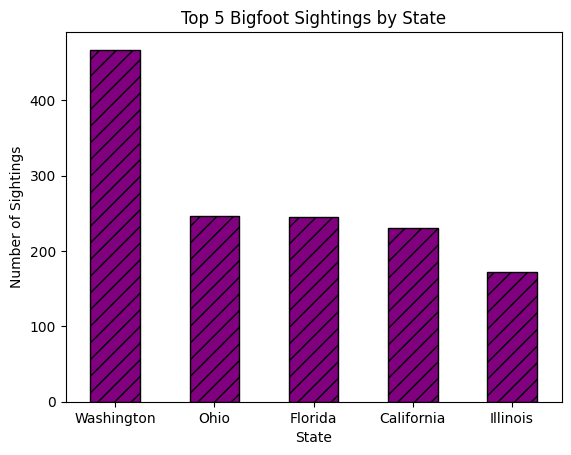

In [52]:
# make charts of top 5 states
stateBar = top_states['state'].value_counts()
stateBar.plot(kind='bar', color='purple', hatch='//', edgecolor= 'black')

plt.title("Top 5 Bigfoot Sightings by State")
plt.xlabel("State")
plt.xticks(rotation= 0)
plt.ylabel("Number of Sightings")

plt.savefig("..//Data Cleaning/resources/images/bigfoot_bystate.png")

In [80]:
# most common years for bigfoot sightings
bigfootData['timestamp'] = pd.to_datetime(bigfootData['timestamp'])
# bigfootData.info()


bf_years = bigfootData.groupby(bigfootData.timestamp.dt.year)['timestamp'].count().sort_values(ascending=False)
bf_years

timestamp
2004    178
2005    172
2006    147
2000    125
2008    120
       ... 
1948      1
1947      1
1944      1
1942      1
1930      1
Name: timestamp, Length: 79, dtype: int64

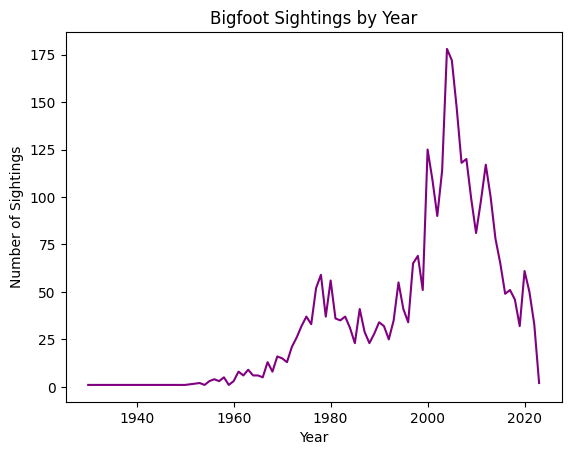

In [116]:
# sort years
bf_years_sorted = bf_years.sort_index()

bf_years_sorted.plot(kind='line', color='purple')

plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('Bigfoot Sightings by Year')

plt.savefig("..//Data Cleaning/resources/images/bigfoot_byyear.png")

In [130]:
# most common day of the month for bigfoot sightings

bigfoot_days = bigfootData.groupby(bigfootData.timestamp.dt.day)['timestamp'].count().sort_values(ascending=False)
bigfoot_top_days = bigfoot_days.head(5)
bigfoot_top_days

timestamp
15    636
1     385
20    120
30    116
14    115
Name: timestamp, dtype: int64

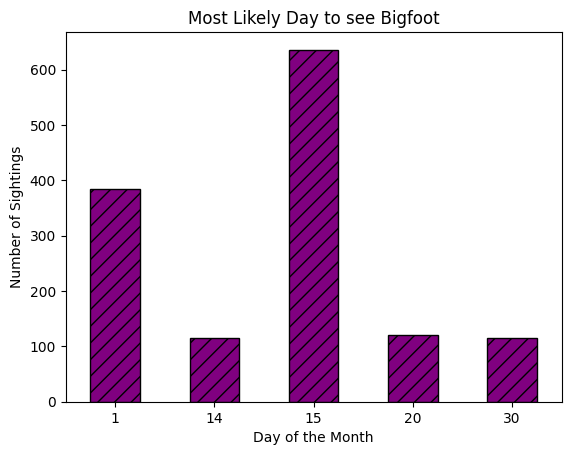

In [133]:
# sort years
bigfoot_top_days_sorted = bigfoot_top_days.sort_index()

bigfoot_top_days_sorted.plot(kind='bar', color='purple', hatch='//', edgecolor= 'black')

plt.xlabel('Day of the Month')
plt.ylabel('Number of Sightings')
plt.title('Most Likely Day to see Bigfoot')
plt.xticks(rotation= 0)

plt.savefig("..//Data Cleaning/resources/images/bigfoot_byday.png")

### UFO Data Analysis

In [45]:
ufo = pd.read_csv("..//Data Cleaning/resources/ufo_data.csv")
ufoData = pd.DataFrame(ufo)
ufoData.head()

,Unnamed: 0,country,state,datetime,shape,duration,description,latitude,longitude
0,0,USA,NY,2000-01-01 00:01:00,sphere,2 minutes,"I was celebreating with my friends, when I saw...",40.752564,-73.984457
1,1,USA,CA,2000-01-01 00:03:00,unknown,2 minutes,High speed weird noise over Los Angeles midnig...,34.043648,-118.299560
2,2,USA,CA,2000-01-01 00:23:00,light,15 sec,Instense Green light traveling from NW to SE. ...,32.836187,-117.162505
3,3,USA,DC,2000-01-01 01:00:00,cylinder,about 1 minute,Near end of 1AM fireworks while standing outsi...,38.907668,-77.025975
4,4,USA,NE,2000-01-01 01:00:00,light,11 minutes,The flying object was moving back & forth in t...,41.249868,-96.036378


In [46]:
#find state with most bigfoot sightings
ufo_state = ufoData.groupby(['state'])['state'].count().sort_values(ascending=False)
ufo_state

state
CA    11553
FL     5889
WA     4783
TX     4216
NY     3955
AZ     3499
PA     3260
IL     3026
OH     2939
NC     2631
OR     2533
MI     2413
CO     2309
GA     1956
MA     1922
VA     1916
MO     1815
WI     1746
IN     1701
NJ     1698
ON     1687
TN     1644
SC     1599
MN     1441
CT     1387
MD     1261
NV     1139
KY     1120
NM     1095
OK     1040
ID      978
UT      928
AL      917
IA      902
KS      816
NH      785
LA      756
AR      741
ME      724
MT      682
WV      554
MS      508
NE      496
RI      434
AK      406
VT      381
HI      323
DE      279
SD      265
WY      243
QC      208
ND      161
BC      113
DC      105
NB       57
YT        6
NS        4
Name: state, dtype: int64

In [49]:
#make dataframe of top 5 states
top_ufo_states = ufoData.loc[ufoData['state'].isin(['CA', 'FL', 'WA', 'TX', 'NY'])]
top_ufo_states = top_ufo_states.drop(columns=['Unnamed: 0'])
top_ufo_states.head()

,country,state,datetime,shape,duration,description,latitude,longitude
0,USA,NY,2000-01-01 00:01:00,sphere,2 minutes,"I was celebreating with my friends, when I saw...",40.752564,-73.984457
1,USA,CA,2000-01-01 00:03:00,unknown,2 minutes,High speed weird noise over Los Angeles midnig...,34.043648,-118.299560
2,USA,CA,2000-01-01 00:23:00,light,15 sec,Instense Green light traveling from NW to SE. ...,32.836187,-117.162505
6,USA,CA,2000-01-01 05:00:00,light,1 min,"It's a plane, it's a star, NO it's a UFO! \n \...",36.834829,-119.677957
8,USA,CA,2000-01-01 16:20:00,light,15 minutes,"It's a cold, clear, sunny, windy day, with lar...",37.769605,-122.423656


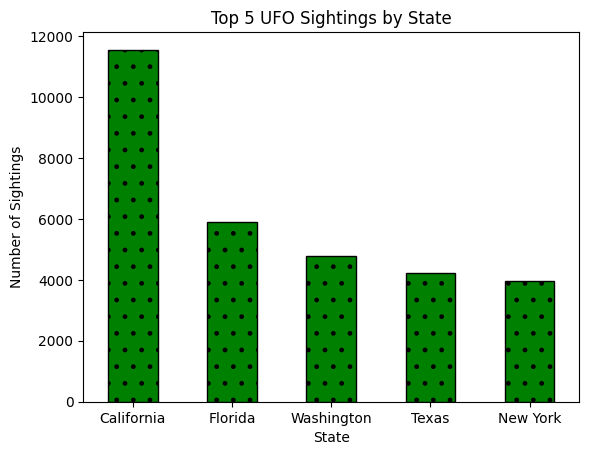

In [65]:
# make charts of top 5 states
ufo_stateBar = top_ufo_states['state'].value_counts()
ufo_stateBar.plot(kind='bar', color='green', hatch='.', edgecolor= 'black')

ufo_x_ticks = [0, 1, 2, 3, 4]
ufo_x_labels = ['California', 'Florida', 'Washington', 'Texas', 'New York']

plt.xticks(rotation= 0, ticks = ufo_x_ticks, labels=ufo_x_labels)

plt.title("Top 5 UFO Sightings by State")
plt.xlabel("State")
plt.ylabel("Number of Sightings")


plt.savefig("..//Data Cleaning/resources/images/ufo_bystate.png")

In [114]:
# most common years for ufo sightings
ufoData['datetime'] = pd.to_datetime(ufoData['datetime'])
# ufoData.info()


ufo_years = ufoData.groupby(ufoData.datetime.dt.year)['datetime'].count().sort_values(ascending=False)
ufo_years

datetime
2014    7094
2012    6638
2013    6416
2015    5664
2020    5228
2016    4691
2019    4535
2011    4527
2008    4143
2017    4140
2009    3753
2010    3741
2007    3612
2004    3412
2005    3355
2003    3111
2022    2828
2006    2743
2018    2647
2001    2600
2002    2563
2000    2281
2021    2223
Name: datetime, dtype: int64

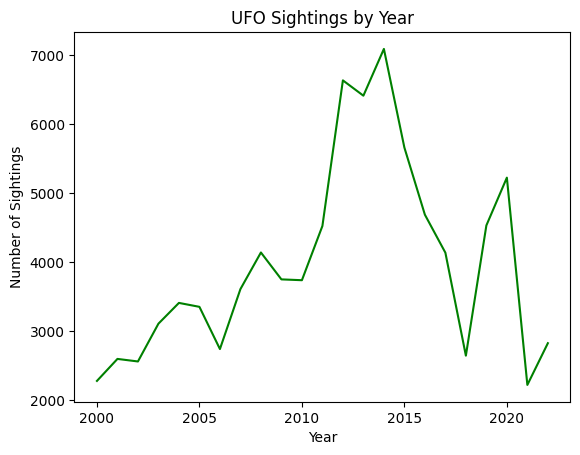

In [121]:
# sort years
ufo_years_sorted = ufo_years.sort_index()

ufo_years_sorted.plot(kind='line', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings by Year')

plt.savefig("..//Data Cleaning/resources/images/ufo_byyear.png")

In [123]:
# most common day of the month for ufo sightings

ufo_days = ufoData.groupby(ufoData.datetime.dt.day)['datetime'].count().sort_values(ascending=False)
ufo_top_days = ufo_days.head(5)
ufo_top_days

datetime
4     4120
1     4084
15    4016
20    3065
24    3052
Name: datetime, dtype: int64

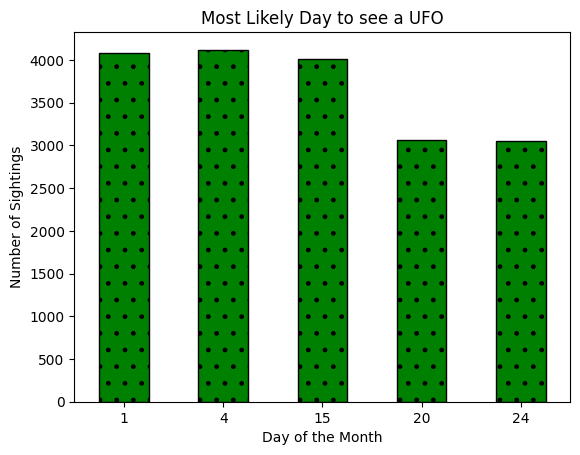

In [129]:
# sort years
ufo_top_days_sorted = ufo_top_days.sort_index()

ufo_top_days_sorted.plot(kind='bar', color='green', hatch='.', edgecolor= 'black')

plt.xlabel('Day of the Month')
plt.ylabel('Number of Sightings')
plt.title('Most Likely Day to see a UFO')
plt.xticks(rotation= 0)

plt.savefig("..//Data Cleaning/resources/images/ufo_byday.png")

### Hauntings Data Analysis

In [4]:
hauntings = pd.read_csv("..//Data Cleaning/resources/hauntedplaces_data.csv")
hauntData = pd.DataFrame(hauntings)
hauntData.head()

,Unnamed: 0,country,description,location,state,longitude,latitude
0,0,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,MI,-85.504893,42.962106
1,1,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,MI,-84.381843,41.971425
2,2,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,MI,-84.035656,41.904538
3,3,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,MI,-84.017565,41.905712
4,4,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,MI,-84.745177,42.244006


In [66]:
#find state with most bigfoot sightings
haunt_state = hauntData.groupby(['state'])['state'].count().sort_values(ascending=False)
haunt_state

state
CA    1003
TX     636
PA     576
MI     460
OH     421
NY     421
IL     344
MA     311
KY     310
FL     302
MO     268
IN     255
WI     250
GA     240
WA     201
TN     195
NC     188
AL     185
VA     177
CT     176
NJ     174
OK     167
SC     150
CO     149
MN     144
AZ     144
OR     143
IA     141
MD     135
UT     119
KS     108
AR      98
WV      93
NE      92
HI      91
LA      85
WY      72
NM      68
SD      65
NH      64
RI      63
ID      61
VT      58
MS      56
NV      54
ND      50
ME      48
MT      38
DE      29
AK      27
DC      16
Name: state, dtype: int64

In [67]:
#make dataframe of top 5 states
top_haunt_states = hauntData.loc[hauntData['state'].isin(['CA', 'TX', 'PA', 'MI', 'OH'])]
top_haunt_states = top_haunt_states.drop(columns=['Unnamed: 0'])
top_haunt_states.head()

,country,description,location,state,longitude,latitude
0,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,MI,-85.504893,42.962106
1,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,MI,-84.381843,41.971425
2,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,MI,-84.035656,41.904538
3,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,MI,-84.017565,41.905712
4,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,MI,-84.745177,42.244006


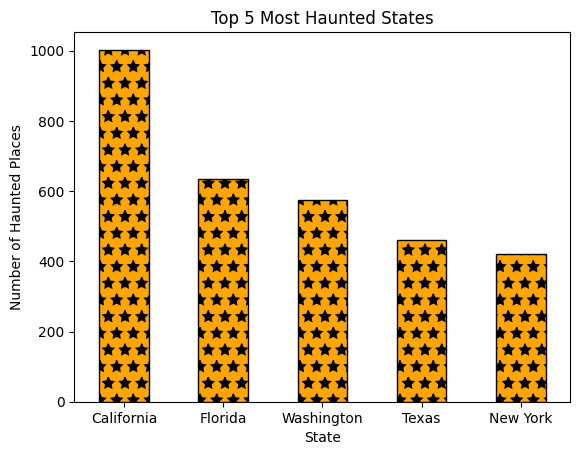

In [70]:
# make charts of top 5 states
haunt_stateBar = top_haunt_states['state'].value_counts()
haunt_stateBar.plot(kind='bar', color='orange', hatch='*', edgecolor= 'black')

haunt_x_ticks = [0, 1, 2, 3, 4]
haunt_x_labels = ['California', 'Florida', 'Washington', 'Texas', 'New York']

plt.xticks(rotation= 0, ticks = haunt_x_ticks, labels=haunt_x_labels)

plt.title("Top 5 Most Haunted States")
plt.xlabel("State")
plt.ylabel("Number of Haunted Places")


plt.savefig("..//Data Cleaning/resources/images/haunts_bystate.png")

In [135]:
haunt_location = hauntData.groupby(['location'])['location'].count().sort_values(ascending=False)
haunt_location


location
Prince Georges county          18
Cemetery                       13
Mission Inn                    12
Wal-Mart                       12
Oviedo                         12
                               ..
Hawks Head cemetery             1
Hawkinsville State Hospital     1
Hawkeye Theater                 1
Haw Chapel Cemetery             1
woods                           1
Name: location, Length: 8703, dtype: int64